In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

9520.150943396224

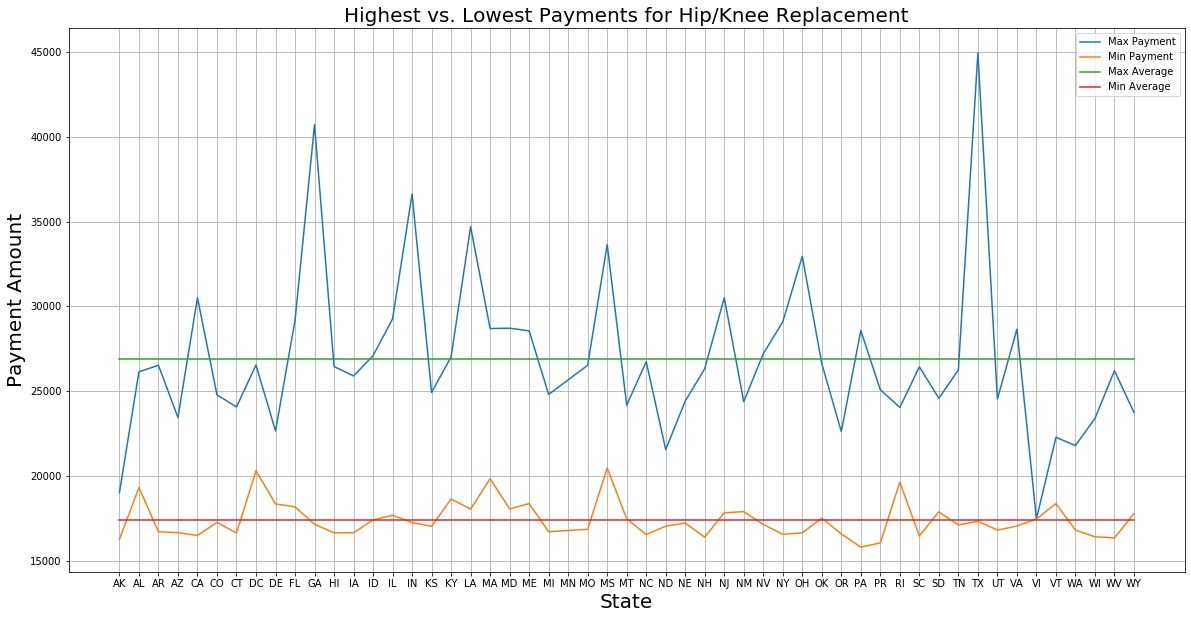

In [5]:
plt.figure(figsize=(20, 10))
payments = pd.read_csv("Payment_and_value_of_care_-_Hospital_CLEAN.csv")
hipcare = payments.loc[payments["Value of care display name"] == "Value of Care hip/knee replacement"]
hipcare['Payment'].replace(",", "", inplace=True, regex=True)
hipcare['Payment'] = hipcare['Payment'].str.replace("$", "", regex=True)
hipcare["Payment"] = hipcare["Payment"].astype(int)
maxpayment = hipcare.groupby("State").agg({"Payment": "max"})
maxpayment.rename(columns={"Payment": "Max Payment"}, inplace=True)
minpayment = hipcare.groupby("State").min()
maxpayment["Min Payment"] = minpayment["Payment"]

maxav = maxpayment["Max Payment"].mean()
minav = maxpayment["Min Payment"].mean()
maxpayment["Max Average"] = maxav
maxpayment["Min Average"] = minav
plt.title("Highest vs. Lowest Payments for Hip/Knee Replacement", fontsize=20)
plt.xlabel("State", fontsize=20)
plt.ylabel("Payment Amount", fontsize=20)
plt.plot(maxpayment)
plt.legend(maxpayment)
plt.grid()
plt.savefig("Hip Knee Replacement Cost Variances.png")
maxav - minav